In [30]:
import tensorflow as tf

In [4]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [5]:
IMAGE_SIZE = 256

In [6]:
BATCH_SIZE = 32

In [7]:
CHANNEL_SIZE = 3

In [8]:
EPOCHS = 50

In [9]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Plant_lf",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size= BATCH_SIZE )
    

Found 2152 files belonging to 3 classes.


In [10]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [11]:
len(dataset)

68

In [12]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())
    print(image_batch[0].shape)
    print(label_batch.numpy())

[[[178. 180. 192.]
  [180. 182. 194.]
  [183. 185. 197.]
  ...
  [178. 181. 198.]
  [175. 178. 195.]
  [173. 176. 193.]]

 [[181. 183. 195.]
  [182. 184. 196.]
  [182. 184. 196.]
  ...
  [178. 181. 198.]
  [176. 179. 196.]
  [174. 177. 194.]]

 [[185. 187. 199.]
  [183. 185. 197.]
  [182. 184. 196.]
  ...
  [178. 181. 198.]
  [177. 180. 197.]
  [175. 178. 195.]]

 ...

 [[144. 142. 153.]
  [146. 144. 155.]
  [147. 145. 156.]
  ...
  [135. 137. 149.]
  [135. 137. 149.]
  [136. 138. 150.]]

 [[144. 142. 153.]
  [143. 141. 152.]
  [140. 138. 149.]
  ...
  [129. 131. 143.]
  [129. 131. 143.]
  [132. 134. 146.]]

 [[143. 141. 152.]
  [140. 138. 149.]
  [135. 133. 144.]
  ...
  [130. 132. 144.]
  [131. 133. 145.]
  [134. 136. 148.]]]
(256, 256, 3)
[0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 2 2 1 1 1 1 0 0 1]


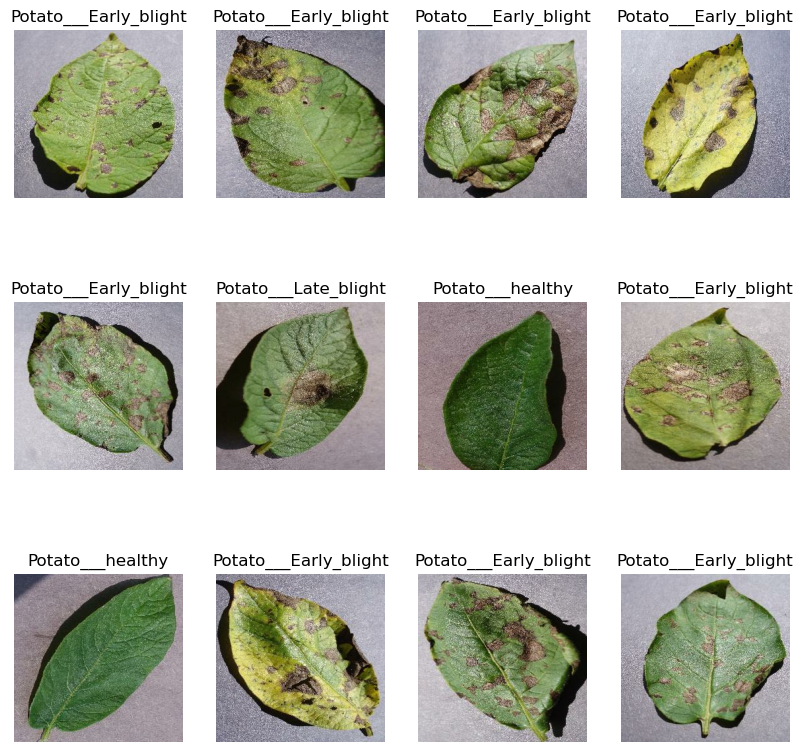

In [13]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
    

In [14]:
80% ==> training
20% == > 10% validation, 10% test

SyntaxError: invalid syntax (2411988731.py, line 1)

In [15]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [16]:
train_ds = dataset.take(54)
len(train_ds)

54

In [17]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [18]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [19]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [20]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [21]:
def get_dataset_partitions_tf(ds,train_split = 0.8 , val_split = 0.1, test_split = 0.1 , shuffle = True, shuffle_size= 10000):

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=12)
        
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds


In [22]:
test_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [23]:
len(train_ds)

54

In [24]:
len(val_ds)

6

In [25]:
len(test_ds)

8

In [26]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [27]:
resize_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [28]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
    ])

In [36]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNEL_SIZE)
n_classes = 3

model = models.Sequential([
    resize_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation = 'relu' , input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3),activation = 'relu' ),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3),activation = 'relu' ),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu' , input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu' , input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu' , input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation= 'relu'),
    layers.Dense(n_classes,activation= 'softmax'),
])

model.build(input_shape=input_shape)

In [38]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(
    optimizer='adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [43]:
history =model.fit(
    train_ds,
    epochs =EPOCHS,
    batch_size= BATCH_SIZE,
    verbose=1,
    validation_data = val_ds
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 25s 458ms/step - accuracy: 0.9882 - loss: 0.0334 - val_accuracy: 0.9940 - val_loss: 0.0217
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 24s 451ms/step - accuracy: 0.9873 - loss: 0.0422 - val_accuracy: 0.9226 - val_loss: 0.2885
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 24s 451ms/step - accuracy: 0.9862 - loss: 0.0363 - val_accuracy: 0.9940 - val_loss: 0.0172
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 24s 451ms/step - accuracy: 0.9930 - loss: 0.0261 - val_accuracy: 0.9524 - val_loss: 0.1138
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 24s 451ms/step - accuracy: 0.9940 - loss: 0.0178 - val_accuracy: 0.9583 - val_loss: 0.1173
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 24s 450ms/step - accuracy: 0.9978 - loss: 0.0060 - val_accuracy: 0.9762 - val_loss: 0.0426
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 25s 457ms/step - accuracy: 0.9994 - loss: 0.0044 - val_accuracy: 0.9940 - val_loss: 0.0296
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 24s 452ms/step - accuracy: 0.9741 - loss: 0.0858 - val_accu

In [41]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.9675 - loss: 0.1446


In [44]:
history

In [45]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss= history.history['val_loss']

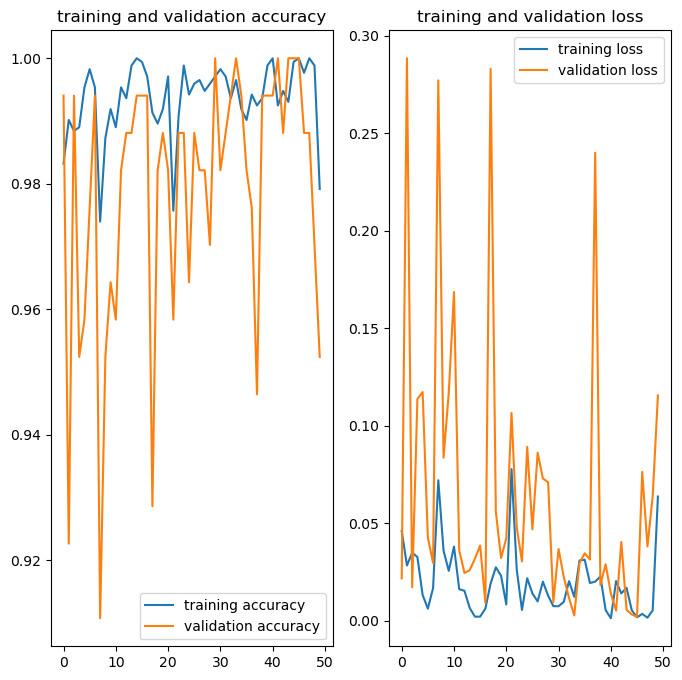

In [52]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label ='training accuracy')
plt.plot(range(EPOCHS),val_acc,label='validation accuracy')
plt.legend(loc='lower right')
plt.title('training and validation accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label ='training loss')
plt.plot(range(EPOCHS),val_loss,label='validation loss')
plt.legend(loc='upper right')
plt.title('training and validation loss')
plt.show()

In [65]:
import numpy as np

first image to predict
actual label :  Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
predicted label: Potato___Early_blight


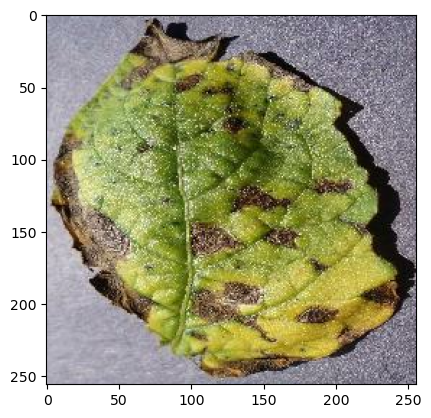

In [68]:
for images_batch, labels_batch in test_ds.take(1):
    first_image= images_batch[0].numpy().astype('uint8')
    first_label= labels_batch[0]

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label : ",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [76]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0) #make batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100* (np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


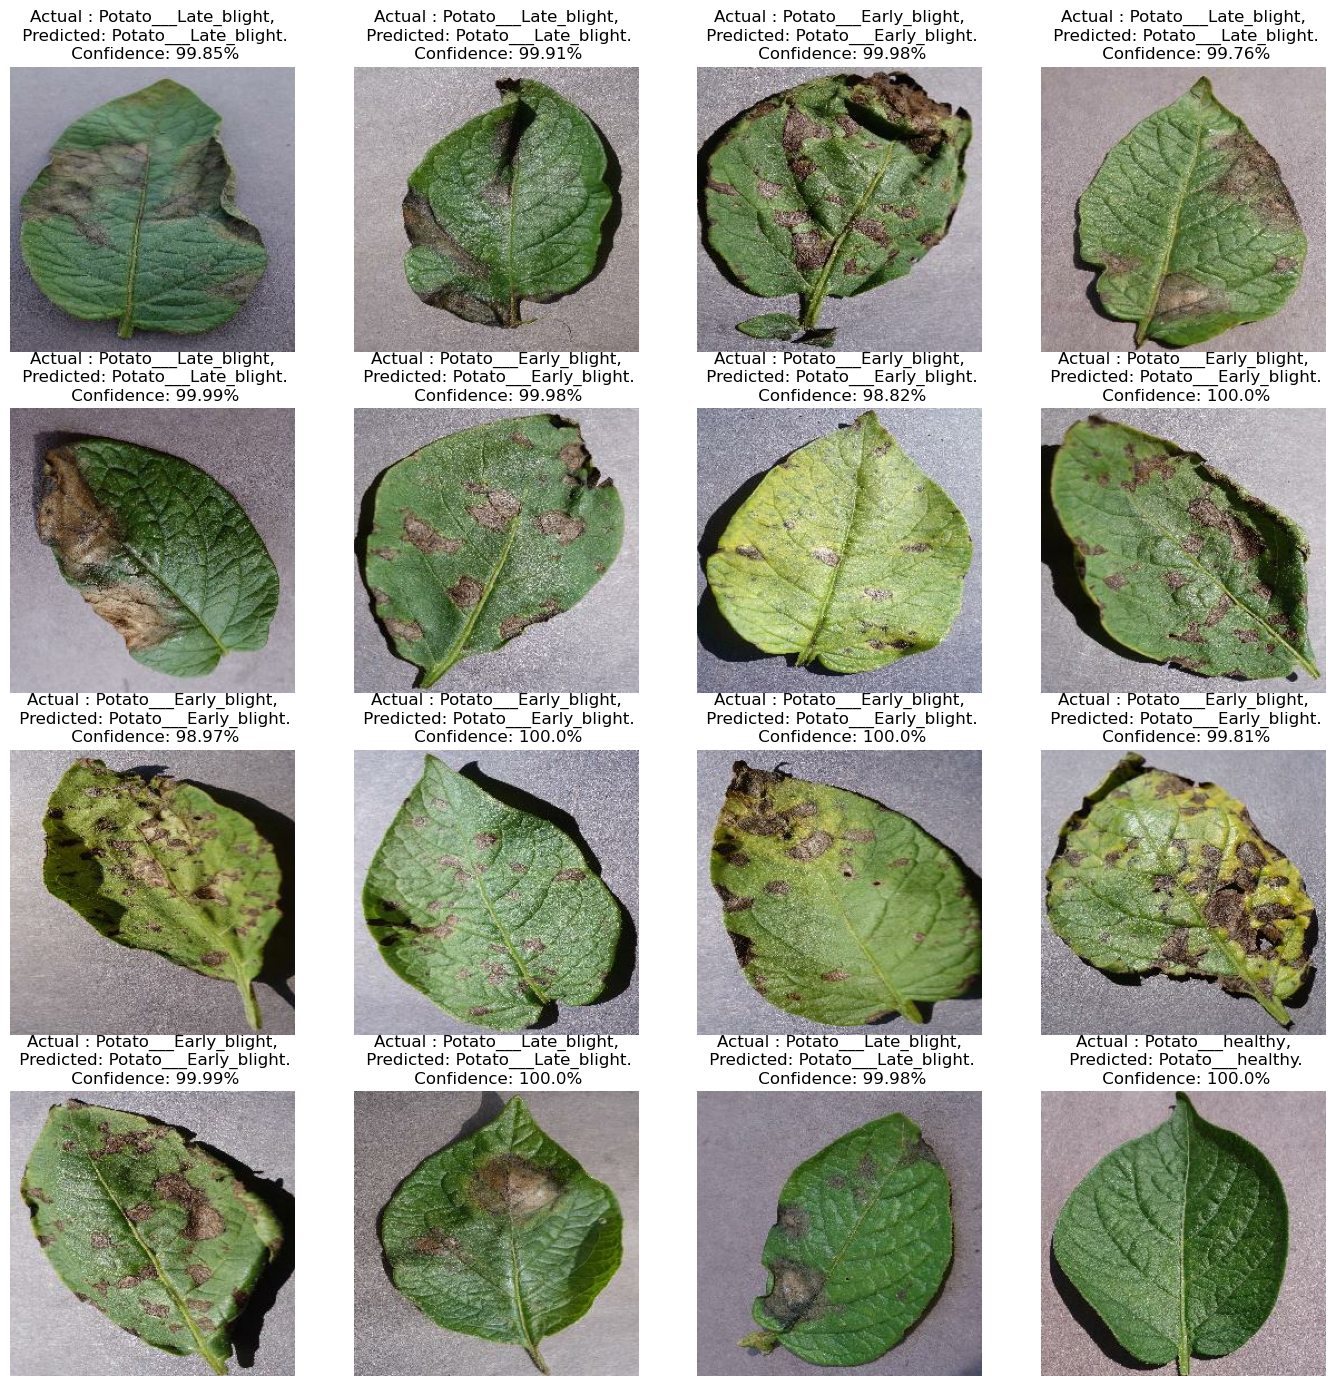

In [92]:
plt.figure(figsize=(17,17))
for images, labels in test_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4,4,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class,confidence = predict(model,images[i].numpy())
        actual_class= class_names[labels[i]]

        plt.title(f"Actual : {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")

In [95]:
model_version = 1
model.export(f"../models/{model_version}.")

INFO:tensorflow:Assets written to: ../models/1.\assets


INFO:tensorflow:Assets written to: ../models/1.\assets


Saved artifact at '../models/1.'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  1711776017744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1711776017360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1711934889168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1711934889936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1711934888208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1711934888592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1711776972240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1711934888976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1711934888784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1711934891856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1711934891088: TensorSpec(shape=(), dt